In [2]:
%load_ext autoreload

In [3]:
%autoreload

# to display progress of lengthy calculations
from IPython.display import clear_output

import numpy as np
from matplotlib import pyplot as plt

from two048.game import Game, init_randomness
from two048.model import Model
import agent, policy

In [4]:
# establish the baseline with random policy

random_policy = policy.RandomPolicy()

n = 1000  # number of games played

In [52]:
score = np.empty(n, dtype=int)
largest_tile = np.empty(n, dtype=int)
move_count = np.empty(n, dtype=int)

for i in range(n):
    clear_output(wait=True)
    game = Game()
    model = Model()
    while not game.is_finished():
        agent.interact(random_policy, game, model)
    score[i] = game.get_value()
    largest_tile[i] = max(game.get_state())
    move_count[i] = len(model.trajectory)
    print("establishing random baseline: {}% finished".format(np.round((i + 1)/n * 100)))

establishing random baseline: 100.0% finished


In [53]:
mean_score = np.mean(score)
mean_tile = np.mean(largest_tile)
mean_moves = np.mean(move_count)

average_score = int(np.round(mean_score))
average_tile = pow(2, int(np.round(mean_tile)))
average_moves = int(np.round(average_moves))

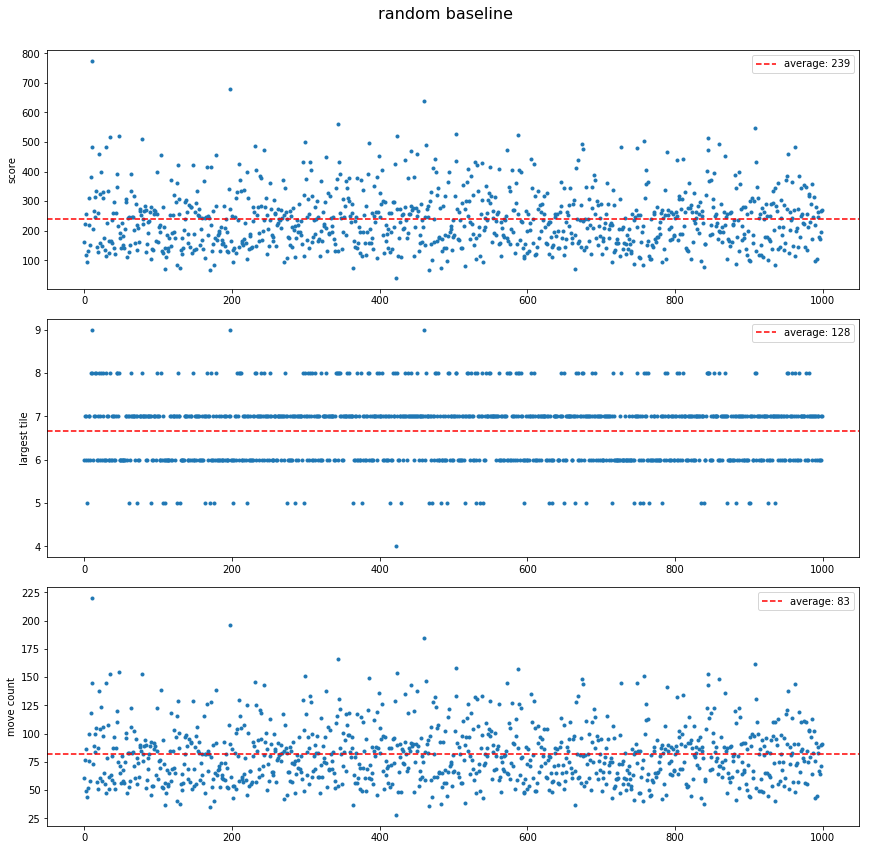

In [75]:
fig, (axes1, axes2, axes3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

# add and adjust figure title
fig.suptitle("random baseline", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

axes1.set(ylabel="score")
axes1.plot(score, ".")
axes1.axhline(y=mean_score, color="red", linestyle="--", label="average: {}".format(average_score))
axes1.legend(loc="upper right")

axes2.set(ylabel="largest tile")
axes2.plot(largest_tile, ".")
axes2.axhline(y=mean_tile, color="red", linestyle="--", label="average: {}".format(average_tile))
axes2.legend(loc="upper right")

axes3.set(ylabel="move count")
axes3.plot(move_count, ".")
axes3.axhline(y=mean_moves, color="red", linestyle="--", label="average: {}".format(average_moves))
axes3.legend(loc="upper right")